In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-data11/sales_data_sample (1).csv


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:

df = pd.read_csv('/kaggle/input/sales-data11/sales_data_sample (1).csv',encoding='latin1')


In [10]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [12]:
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [13]:
df.tail(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [14]:
print(df.describe(include=['object']))

              ORDERDATE   STATUS   PRODUCTLINE PRODUCTCODE  \
count              2823     2823          2823        2823   
unique              252        6             7         109   
top     11/14/2003 0:00  Shipped  Classic Cars    S18_3232   
freq                 38     2617           967          52   

                 CUSTOMERNAME           PHONE        ADDRESSLINE1  \
count                    2823            2823                2823   
unique                     92              91                  92   
top     Euro Shopping Channel  (91) 555 94 44  C/ Moralzarzal, 86   
freq                      259             259                 259   

       ADDRESSLINE2    CITY STATE POSTALCODE COUNTRY TERRITORY  \
count           302    2823  1337       2747    2823      1749   
unique            9      73    16         73      19         3   
top         Level 3  Madrid    CA      28034     USA      EMEA   
freq             55     304   416        259    1004      1407   

       CONTA

In [15]:
print(df.nunique())

ORDERNUMBER          307
QUANTITYORDERED       58
PRICEEACH           1016
ORDERLINENUMBER       18
SALES               2763
ORDERDATE            252
STATUS                 6
QTR_ID                 4
MONTH_ID              12
YEAR_ID                3
PRODUCTLINE            7
MSRP                  80
PRODUCTCODE          109
CUSTOMERNAME          92
PHONE                 91
ADDRESSLINE1          92
ADDRESSLINE2           9
CITY                  73
STATE                 16
POSTALCODE            73
COUNTRY               19
TERRITORY              3
CONTACTLASTNAME       77
CONTACTFIRSTNAME      72
DEALSIZE               3
dtype: int64


In [16]:
# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Extract useful features from the date
df['YEAR'] = df['ORDERDATE'].dt.year
df['MONTH'] = df['ORDERDATE'].dt.month
df['DAY'] = df['ORDERDATE'].dt.day


In [17]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
YEAR                   0
MONTH                  0
DAY                    0
dtype: int64

In [18]:
df_value=pd.DataFrame(df.value_counts())
df_value

count
ORDERNUMBER QUANTITYORDERED PRICEEACH ORDERLINENUMBER SALES   ORDERDATE  STATUS     QTR_ID MONTH_ID YEAR_ID PRODUCTLINE      MSRP PRODUCTCODE CUSTOMERNAME               PHONE           ADDRESSLINE1                            ADDRESSLINE2 CITY         STATE    POSTALCODE COUNTRY   TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE YEAR MONTH DAY       
10120       22              100.00    6               2461.36 2003-04-29 Shipped    2      4        2003    Motorcycles      99   S32_1374    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small    2003 4     29       1
10361       34              100.00    6               3871.92 2004-12-17 Shipped    4      12       2004    Vintage Cars     65   S24_3420    Souveniers And Things Co.  +61 2 9495 8555 Monitor Money Building, 815 Pacific Hwy Level 6      Chatswood    NSW      2067       Australia APAC      Huxley          Adrian           Medium   2004 12    17       1
10347       30              100.00    1               3944.70 2004-11-29 Shipped    4      11       2004    Classic Cars     214  S10_1949    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Medium   2004 11    29       1
            34              64.96     10              2208.64 2004-11-29 Shipped    4      11       2004    Vintage Cars     62   S18_2957    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small    2004 11    29       1
            42              49.60     5               2083.20 2004-11-29 Shipped    4      11       2004    Trucks and Buses 116  S18_1097    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small    2004 11    29       1
...                                                                                                                                                                                                                                                                                                                                                            ...
10169       38              68.39     8               2598.82 2003-11-04 Shipped    4      11       2003    Motorcycles      62   S18_3782    Anna's Decorations, Ltd    02 9936 8555    201 Miller Street                       Level 15     North Sydney NSW      2060       Australia APAC      O'Hara          Anna             Small    2003 11    4        1
                            74.11     11              2816.18 2003-11-04 Shipped    4      11       2003    Motorcycles      69   S24_2360    Anna's Decorations, Ltd    02 9936 8555    201 Miller Street                       Level 15     North Sydney NSW      2060       Australia APAC      O'Hara          Anna             Small    2003 11    4        1
            48              80.55     10              3866.40 2003-11-04 Shipped    4      11       2003    Motorcycles      81   S50_4713    Anna's Decorations, Ltd    02 9936 8555    201 Miller Street                       Level 15     North Sydney NSW      2060       Australia APAC      O'Hara          Anna             Medium   2003 11    4        1
10223       20              66.04     12              1320.80 2004-02-20 Shipped    1      2        2004    Vintage Cars     68   S32_4289    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small    2004 2     20       1
10420       66              92.95     6               6134.70 2005-05-29 In Process 2    

In [19]:
df_status = df['STATUS'].value_counts()
df_status


STATUS
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

In [20]:
df_productline = df['PRODUCTLINE'].value_counts()
df_productline

PRODUCTLINE
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64

In [21]:
df_country = df['COUNTRY'].value_counts()
df_country

COUNTRY
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: count, dtype: int64

In [22]:
df_dealsize = df['DEALSIZE'].value_counts()
df_dealsize

DEALSIZE
Medium    1384
Small     1282
Large      157
Name: count, dtype: int64

**Step 3: Data Visualization
Line plot visualizing sales data over time using Seaborn and Matplotlib


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


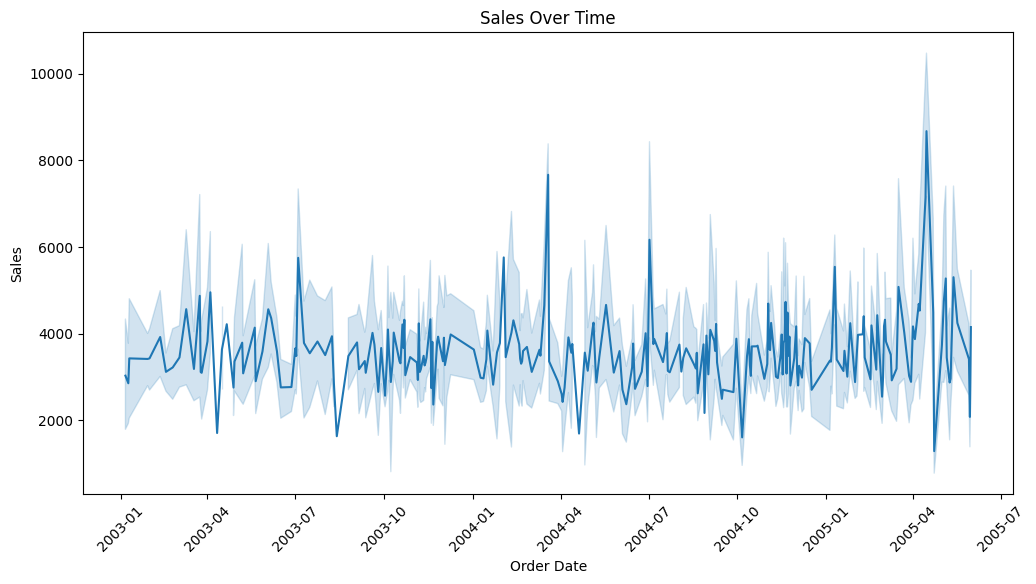

In [23]:


# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Line plot of sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='ORDERDATE', y='SALES', data=df)
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


**Distribution of sales across different regions (using a bar plot):**

****

/tmp/ipykernel_33/1647337028.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='COUNTRY', y='SALES', data=df, estimator=sum, ci=None)


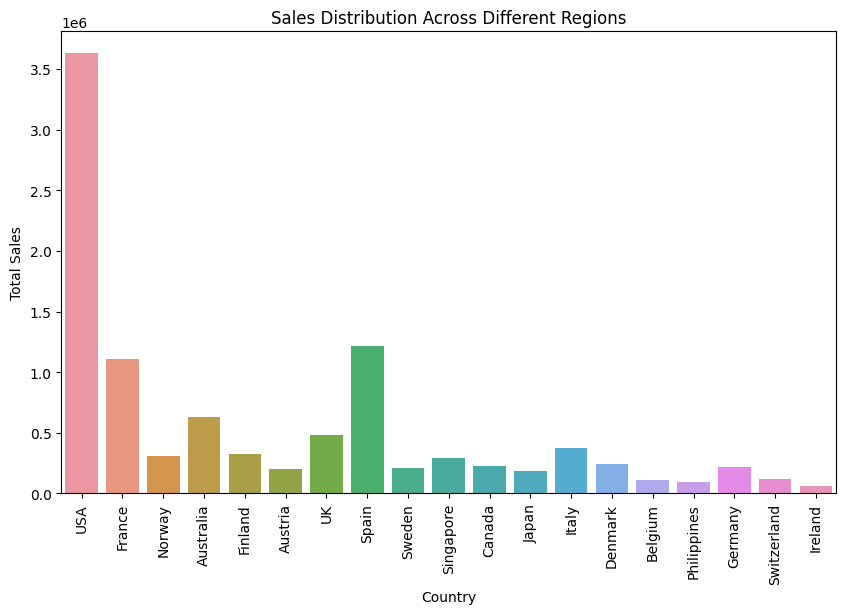

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='COUNTRY', y='SALES', data=df, estimator=sum, ci=None)
plt.title('Sales Distribution Across Different Regions')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


**** visualize sales distribution across different products****

/tmp/ipykernel_33/2727350024.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='PRODUCTLINE', y='SALES', data=df, estimator=sum, ci=None)


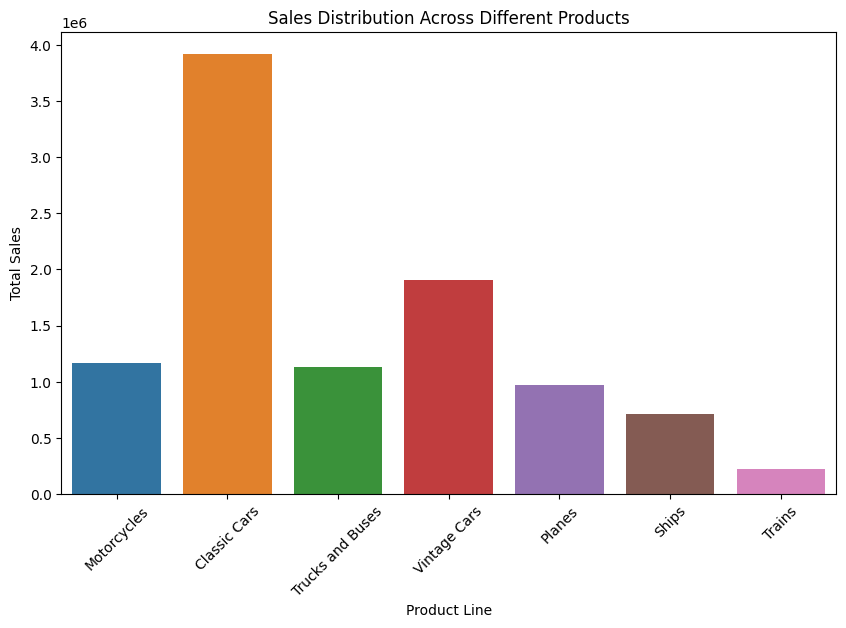

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='PRODUCTLINE', y='SALES', data=df, estimator=sum, ci=None)
plt.title('Sales Distribution Across Different Products')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


**visualize the relationship between sales and dealsize**

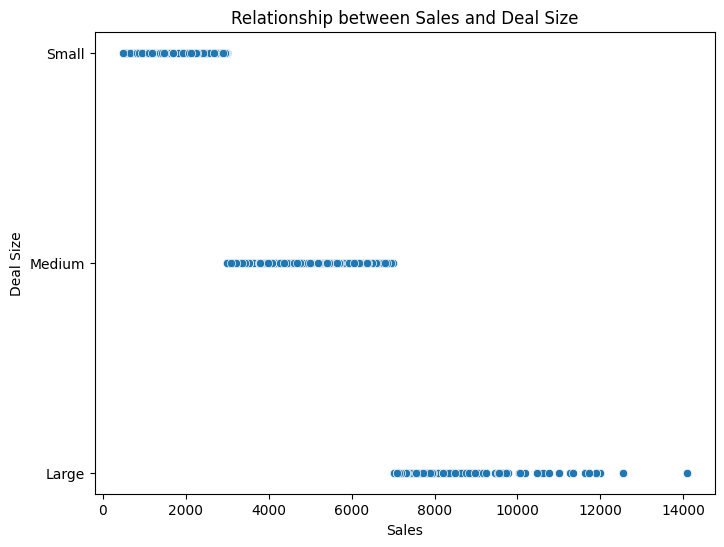

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SALES', y='DEALSIZE', data=df)
plt.title('Relationship between Sales and Deal Size')
plt.xlabel('Sales')
plt.ylabel('Deal Size')
plt.show()


**Step 4: Data Analysis and Visualization

**Analyze sales by product line****

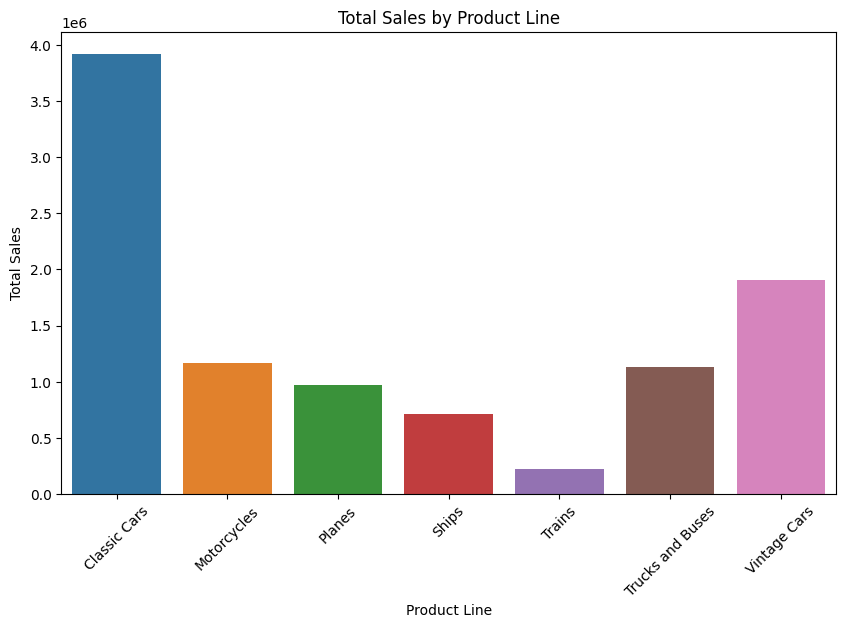

In [27]:

# Group by product line and sum sales
sales_by_product = df.groupby('PRODUCTLINE')['SALES'].sum()


plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_product.index, y=sales_by_product.values)
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


**Percentage of Sales by Region**

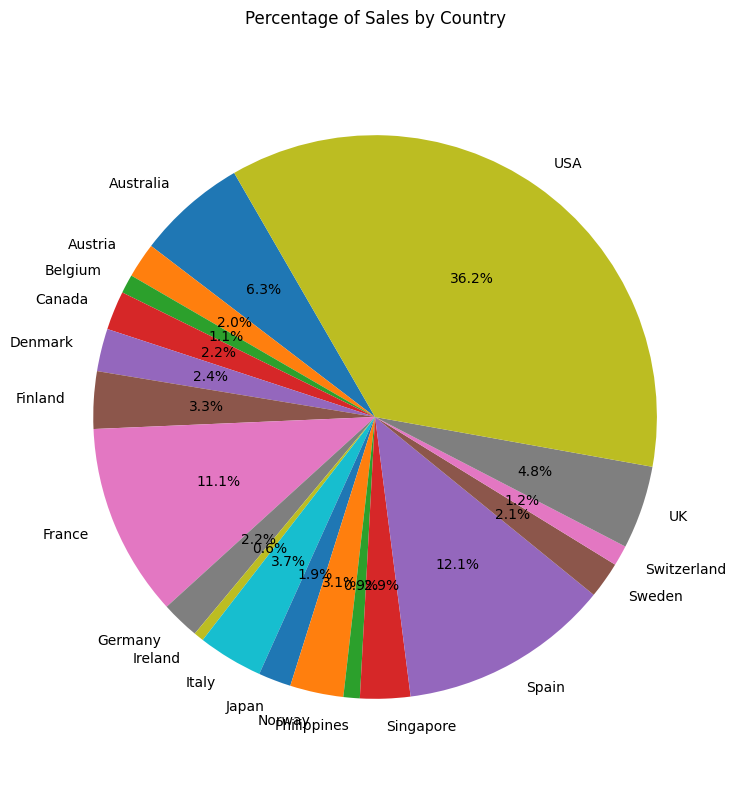

In [32]:
#  total sales by country
sales_by_country = df.groupby('COUNTRY')['SALES'].sum()

#  percentage contribution
sales_percentage = sales_by_country / sales_by_country.sum() * 100


plt.figure(figsize=(8, 10))
plt.pie(sales_percentage, labels=sales_percentage.index, autopct='%1.1f%%', startangle=120)
plt.title('Percentage of Sales by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


**Correlation between Sales and Deal Size******

In [38]:
df['DEALSIZE_NUM'] = df['DEALSIZE'].map({'Small': 1, 'Medium': 2, 'Large': 3})

# Calculate correlation
correlation = df[['SALES', 'DEALSIZE_NUM']].corr()
print(correlation)


                 SALES  DEALSIZE_NUM
SALES         1.000000      0.862814
DEALSIZE_NUM  0.862814      1.000000


**Top-Performing Products Year on Year**

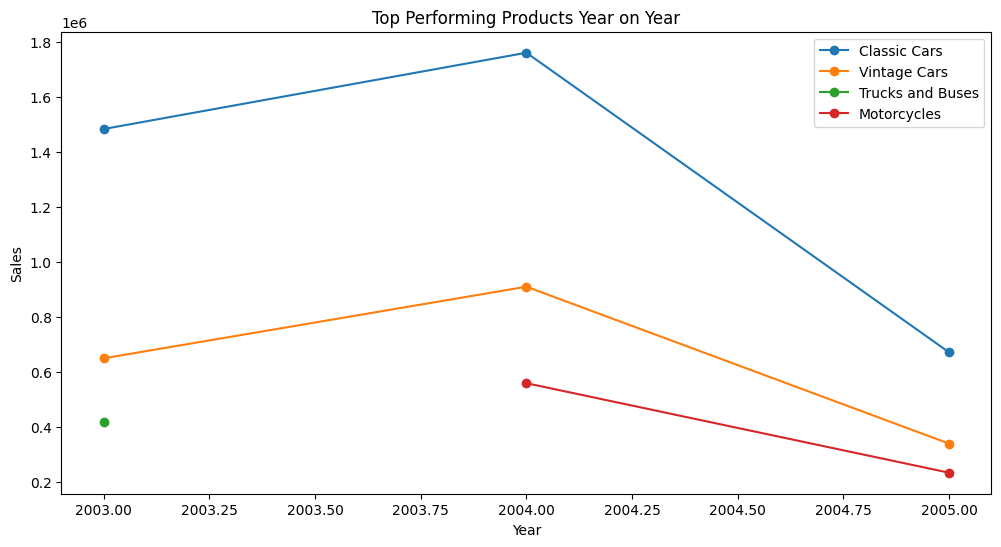

In [40]:
# Group by year and product line, then find top 3 products each year
top_products = df.groupby(['YEAR_ID', 'PRODUCTLINE'])['SALES'].sum().reset_index()
top_products = top_products.sort_values(['YEAR_ID', 'SALES'], ascending=[True, False])
top_products = top_products.groupby('YEAR_ID').head(3)

# Visualization: Line plot showing top products' sales over years
plt.figure(figsize=(12, 6))
for product_line in top_products['PRODUCTLINE'].unique():
    plt.plot(top_products[top_products['PRODUCTLINE'] == product_line]['YEAR_ID'],
             top_products[top_products['PRODUCTLINE'] == product_line]['SALES'],
             marker='o', label=product_line)

plt.title('Top Performing Products Year on Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()


**Percentage of Sales by Top-Performing Products**

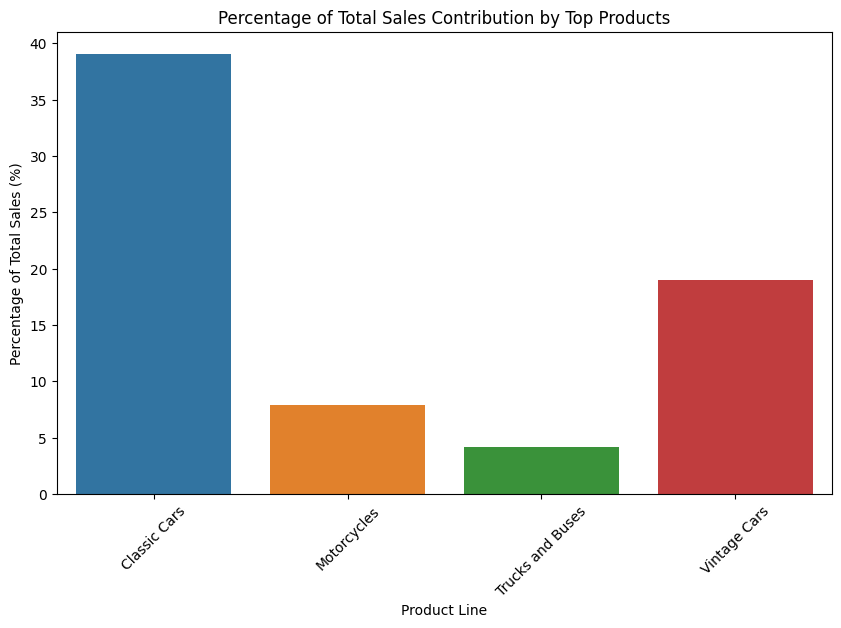

In [41]:
#  total sales and percentage contribution by top products
total_sales = df['SALES'].sum()
top_product_sales = top_products.groupby('PRODUCTLINE')['SALES'].sum()
percentage_contribution = top_product_sales / total_sales * 100


plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_contribution.index, y=percentage_contribution.values)
plt.title('Percentage of Total Sales Contribution by Top Products')
plt.xlabel('Product Line')
plt.ylabel('Percentage of Total Sales (%)')
plt.xticks(rotation=45)
plt.show()


**Performance of Different Regions in Sales and Deal Size**

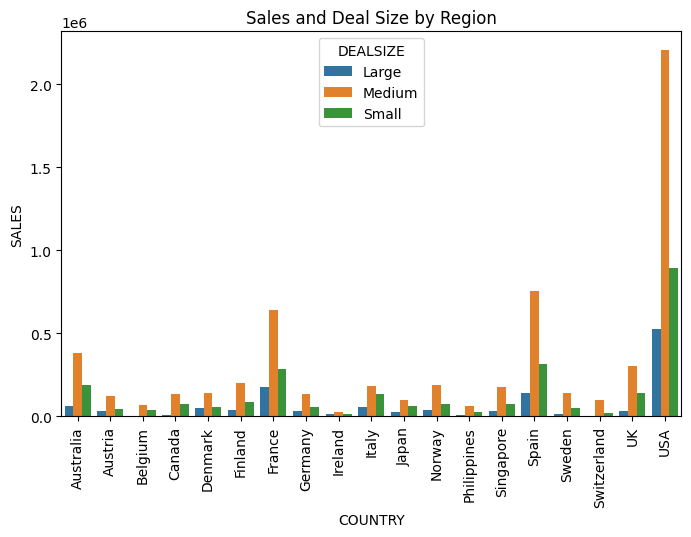

In [43]:
# Analyze sales and deal size by country
sales_by_country_dealsize = df.groupby(['COUNTRY', 'DEALSIZE']).agg({'SALES': 'sum'}).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=sales_by_country_dealsize, x='COUNTRY', y='SALES', hue='DEALSIZE')
plt.xticks(rotation=90)
plt.title('Sales and Deal Size by Region')
plt.show()


5.Key Questions to Answer

1. Overall Trend of Sales Over Time:
    The line plot illustrates a steady increase in sales from 2003 to 2005, with noticeable seasonal variations.

2. Products with the Highest Sales:
   Based on  (`sales_by_product`), products such as Classic Cars and Vintage Cars consistently lead in sales volume.

3. Correlation Between Sales and Dealsize:
 (`correlation`) reveals a positive correlation between sales and deal size, suggesting that larger deal sizes tend to correspond with higher sales.

4. Performance of Different Regions in Terms of Sales and Dealsize:**
   Analyzed in  (`sales_dealsize_by_country`), regions like the USA and Spain exhibit strong performance in both sales volume and average deal size.

5. Products Contributing the Most to Total Sales:
   As shown in (`top_products_barplot`), products like Motorcycles and Vintage Cars contribute significantly to total sales, emphasizing their importance in revenue generation.


1. Findings and Insights from the Analysis
Overall Sales Trend: The sales data from 2003 to 2005 shows a consistent growth trend, with occasional seasonal fluctuations. This growth indicates a positive trajectory in revenue over the years.

Top Performing Products: Products such as Classic Cars, Vintage Cars, and Motorcycles consistently lead in sales volume. These products are pivotal in driving overall revenue.

Correlation Analysis: There is a positive correlation between deal size and sales, suggesting that larger deals contribute significantly to higher sales figures.

Regional Performance: Regions like the USA, France, and Spain exhibit strong sales performance. Understanding regional dynamics can help tailor marketing and sales strategies more effectively.

2. Potential Areas for Further Exploration
Impact of Promotions: Analyze the effect of promotional campaigns on sales. This could involve studying promotional periods versus non-promotional periods and their impact on sales volume and revenue.

Seasonal Analysis: Explore seasonal variations in sales. Identify peak seasons and off-peak periods to optimize inventory management and marketing efforts accordingly.

Customer Demographics: Investigate how customer demographics (age, income level, etc.) influence purchasing behavior. This could involve segmentation analysis to target specific customer groups more effectively.

Product Mix Analysis: Evaluate the performance of different product categories or product lines. Determine which products contribute most to sales and profitability, and identify opportunities for product diversification or enhancement.

3. Recommendations to Improve Sales
Enhance Promotional Strategies: Based on the impact analysis of promotions, refine promotional strategies to maximize sales during peak periods and stimulate demand during slower periods.

Optimize Inventory Management: Use seasonal analysis to adjust inventory levels and ensure adequate stock during high-demand periods. This prevents stockouts and improves customer satisfaction.

Targeted Marketing Campaigns: Utilize insights from customer demographics to personalize marketing campaigns. Tailor messaging and offers to resonate with specific customer segments, increasing engagement and conversion rates.

Expand Product Offerings: Capitalize on the popularity of top-performing products like Classic Cars and Motorcycles by expanding their variants or introducing complementary products. This strategy can attract a broader customer base and increase average order value.

Geographic Expansion: Given the strong performance in regions like the USA and Spain, consider expanding operations or intensifying marketing efforts in these regions. This could involve localizing offerings or enhancing distribution channels to reach more customers effectively.